#### Name:P Megna
#### Roll No.: EE21B085

### 1D polynomial 

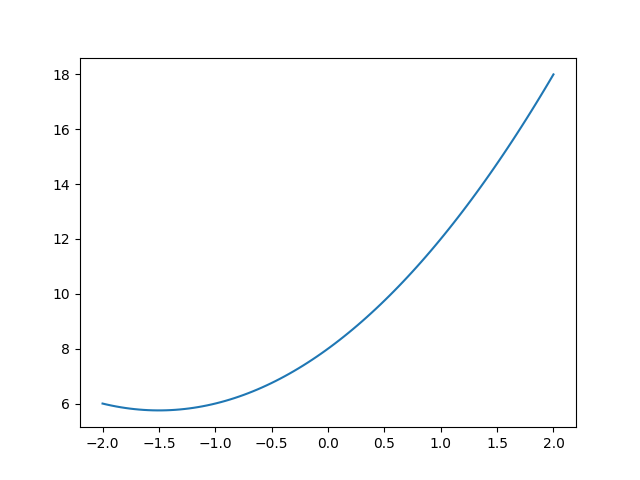

In [15]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def gradient_descent(cfunc,cfuncd,bestx,bestcost,lr,xbase):
    rangemin, rangemax = -5, 5 
    fig, ax = plt.subplots()
    ybase = cfunc(xbase)
    ax.plot(xbase, ybase)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)


    def onestepderiv(frame):
        global bestcost, bestx, lr
        x = bestx - cfuncd(bestx) * lr 
        bestx = x
        y = cfunc(x)
        lngood.set_data(x, y)
        xall.append(x)
        yall.append(y)
        lnall.set_data(xall, yall)
        return lngood,
       
    ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
    return ani
def cfunc(x):
    return x ** 2 + 3 * x + 8

def cfuncd(x):
    return 2 * x + 3

xbase = np.linspace(-2, 2, 100)
bestcost = 100000
bestx = 0
lr=0.1


gradient_descent(cfunc,cfuncd,bestx,bestcost,lr,xbase)
   


### 2D polynomial

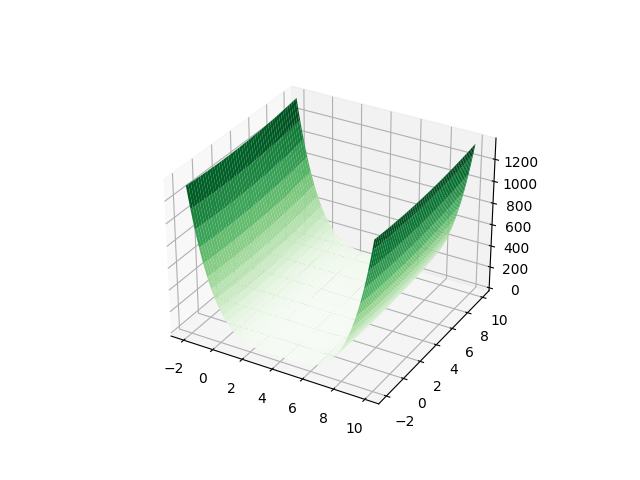

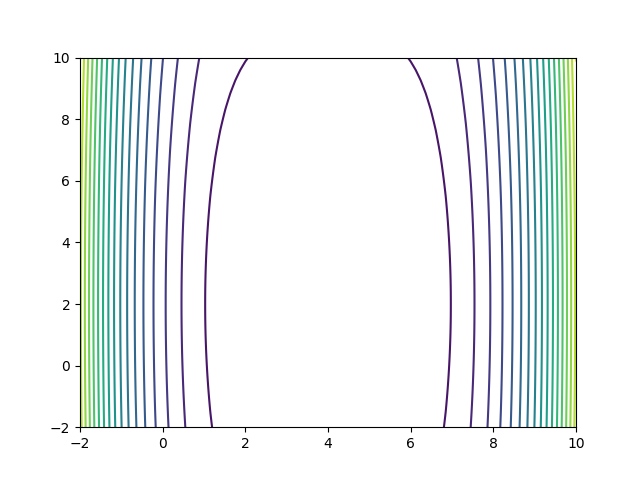

In [16]:
%matplotlib ipympl
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
def f(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def dfdx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def dfdy(x, y):
    return 2*y - 4



def gradient_descent(bestx,besty,bestcost,lr):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    xall, yall, zall = [], [], []
    lnall, = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
    
    xbase = np.linspace(-2, 10, 100)
    ybase = np.linspace(-2, 10, 100)
    X, Y = np.meshgrid(xbase, ybase)
    Z = f(X, Y)
    ax.plot_surface(X, Y, Z, cmap='Greens', edgecolor='none')
    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, levels=20)
    
    def onestepderiv(frame):
        global f,dfdx,dfdy,bestx,besty,bestcost,lr
        x = bestx - dfdx(bestx,besty) * lr 
        bestx = x
        y = besty - dfdy(bestx,besty) * lr
        besty = y
        z = f(x,y)
        lngood.set_data([x],[y])
        lngood.set_3d_properties([z]) 
        #I have used set_3d_properties as .set_data allows only 2D objects
        xall.append(x)
        yall.append(y)
        zall.append(z)
        lnall.set_data(xall,yall)
        lnall.set_3d_properties(zall)
    
    ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
    return ani
bestcost = 100000
bestx = -2
besty = 0
lr=0.001      
#I tried various values of lr and this value gave discrete and properly spaced points during animation
gradient_descent(bestx,besty,bestcost,lr)

### 2D function

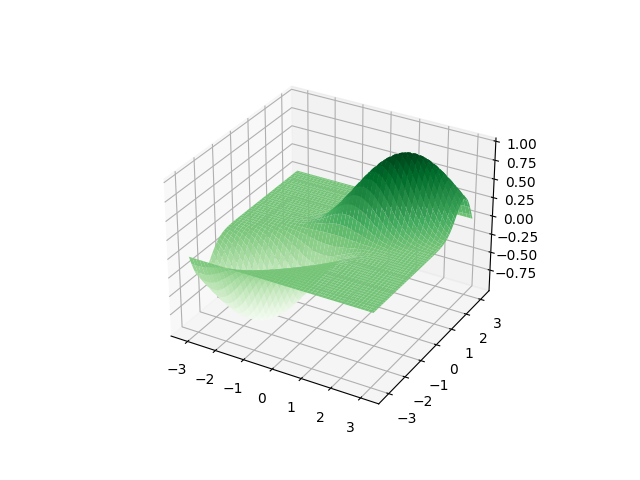

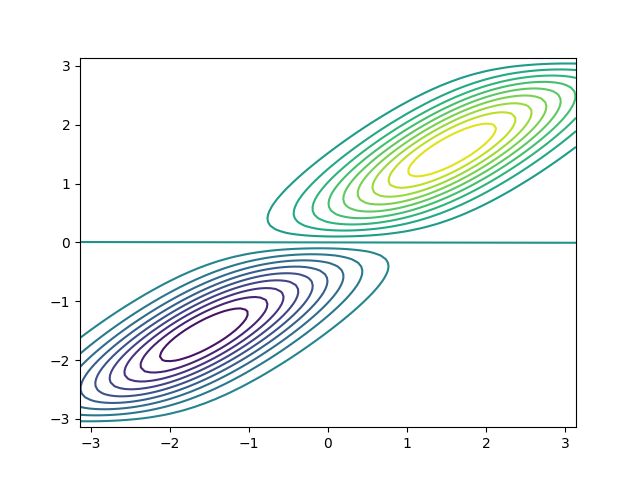

In [13]:
%matplotlib ipympl
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numpy import cos, sin, pi, exp 

def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def f4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)
def gradient_descent(bestx,besty,bestcost,lr):
    global f,dfdx,dfdy
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    xall, yall, zall = [], [], []
    lnall, = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
    
    xbase = np.linspace(-pi,pi, 100)
    ybase = np.linspace(-pi,pi, 100)
    X, Y = np.meshgrid(xbase, ybase)
    Z = f4(X, Y)
    ax.plot_surface(X, Y, Z , cmap='Greens', edgecolor='none')
    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, levels=20)
    
    def onestepderiv(frame):
        global f4,f4_dx,f4_dy,bestx,besty,bestcost,lr
        x = bestx - f4_dx(bestx,besty) * lr 
        bestx = x
        y = besty - f4_dy(bestx,besty) * lr
        besty = y
        z = f4(x,y)
        lngood.set_data([x],[y])
        lngood.set_3d_properties([z])
        xall.append(x)
        yall.append(y)
        zall.append(z)
        lnall.set_data(xall,yall)
        lnall.set_3d_properties(zall)
    
    ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
    return ani
bestcost = 100000
bestx = -2
besty = -2
lr=0.3
gradient_descent(bestx,besty,bestcost,lr)

### 1D trigonometric

> As the derivative of the function is not provided, we can use the iterative improvement method to optimise the function and obtain minima.

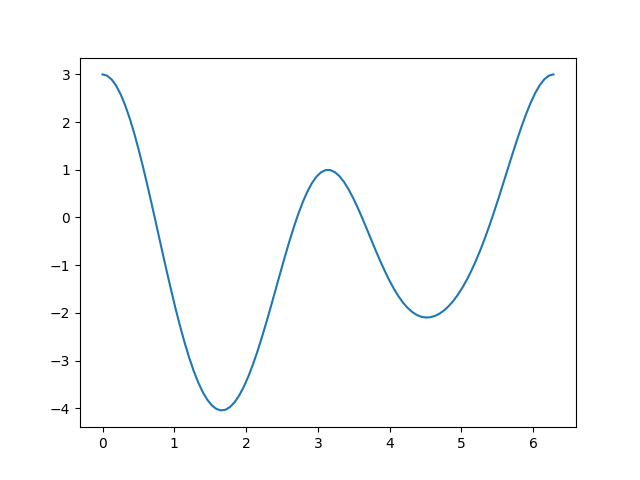

In [12]:
%matplotlib ipympl
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numpy import cos, sin, pi, exp 

def gradient_descent(f5,bestx,bestcost):
    fig, ax = plt.subplots()
    xbase = np.linspace(0, 2*pi, 100)
    ybase = f5(xbase)
    plt.plot(xbase, ybase)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
    

    def onestep(frame):
        global f5,bestcost, bestx
        x = np.random.random_sample() * 4 - 2
        y = f5(x)
        if y < bestcost:
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        else:
            pass
        xall.append(x)
        yall.append(y)
        lnall.set_data(xall, yall)
        return lngood,

    ani= FuncAnimation(fig, onestep, frames=range(10), interval=1000, repeat=False)
    return ani
def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1
bestcost=100000
bestx=3
gradient_descent(f5,bestx,bestcost)